In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [5]:
with xr.open_dataset('./nc/constant.nc') as constant: 
    # Round time to 3 decimals so there is proper alignment
    constant["t"] = constant.t.round(decimals=3)

    # Apply coordinate transform
    constant["Z"] = constant.zbed + constant.Z * constant.height 

with xr.open_dataset('./nc/variable.nc') as variable: 
    # Round time to 3 decimals so there is proper alignment
    variable["t"] = variable.t.round(decimals=3)

    # Apply coordinate transform
    variable["Z"] = variable.zbed + variable.Z * variable.height 

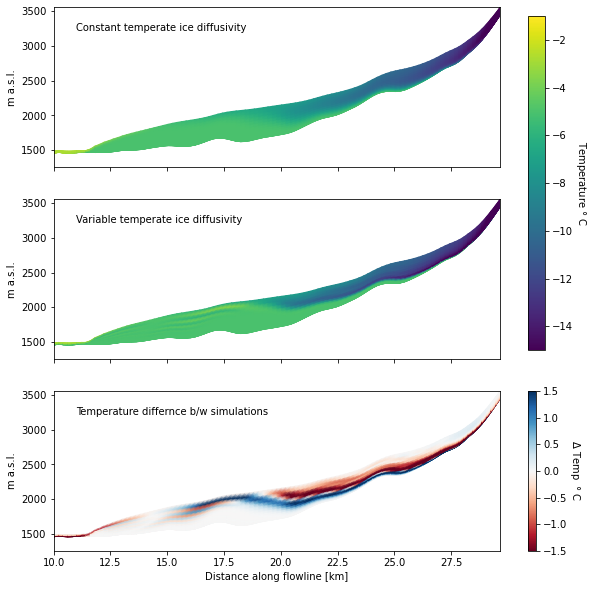

In [66]:
fig, ax = plt.subplots(3,1,sharex=True, sharey=True,
                       figsize=(10,10),
                       #constrained_layout=True
                      )

im   = ax[0].pcolormesh(constant.X / 1e3, 
                        constant.Z.isel(t=-1), 
                        constant.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[0].text(0.05, 0.85, 'Constant temperate ice diffusivity', 
         transform=ax[0].transAxes)

im   = ax[1].pcolormesh(variable.X / 1e3, 
                        variable.Z.isel(t=-1), 
                        variable.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[1].text(0.05, 0.85, 'Variable temperate ice diffusivity', 
         transform=ax[1].transAxes)

diff = ax[2].pcolormesh(variable.X / 1e3, 
                        variable.Z.isel(t=-1), 
                        variable.temperature.isel(t=-1)- constant.temperature.isel(t=-1),
                        vmin=-1.5, vmax=1.5,
                        shading='gouraud', 
                        cmap='RdBu')

ax[2].text(0.05, 0.85, 'Temperature differnce b/w simulations', 
         transform=ax[2].transAxes)

ax[0].set_xlim(10e3 / 1e3,None)

for i in range(0,3):
    ax[i].set_ylabel('m a.s.l.')    

ax[2].set_xlabel('Distance along flowline [km]')    

cbar0 = fig.colorbar(im,   ax=ax[0:2], shrink=0.95)
cbar1 = fig.colorbar(diff, ax=ax[2])

cbar0.set_label('Temperature $\degree$ C', rotation=270, labelpad=15)
cbar1.set_label('$\Delta$ Temp  $\degree$ C', rotation=270, labelpad=15)

fig.savefig('diffusivity.png', dpi=300, bbox_inches='tight', facecolor='w')

In [15]:
np.minimum(constant.temperature.min().values, 
           variable.temperature.min().values)

np.maximum(constant.temperature.max().values, 
           variable.temperature.max().values)

-1.3988910913467407